# Capstone Modul 2

## Latar Belakang
Perusahaan penyedia layanan Software as a Service (SaaS) selama ini menjalankan berbagai program diskon untuk mendorong penjualan dan meningkatkan akuisisi pelanggan. Diskon digunakan sebagai strategi promosi yang diharapkan mampu menarik lebih banyak transaksi di berbagai wilayah dan lini produk.

Namun, efektivitas program diskon tersebut belum pernah dievaluasi secara menyeluruh. Perusahaan belum mengetahui wilayah mana yang menjadi kontributor utama penjualan dan profit, produk mana yang benar-benar menguntungkan, serta sejauh mana diskon yang diberikan memengaruhi profit margin pada level transaksi. Tanpa pemahaman ini, perusahaan berisiko memberikan diskon secara kurang tepat sasaran, sehingga mengurangi profitabilitas.

## Pernyataan Masalah

Perusahaan ingin mendapatkan gambaran yang lebih jelas mengenai kinerja penjualan dan profit di berbagai wilayah serta lini produk, sekaligus memahami bagaimana diskon berperan dalam membentuk profit margin. Informasi ini penting untuk membantu perusahaan mengoptimalkan strategi penjualan, menetapkan kebijakan diskon yang lebih efektif, dan menjaga profitabilitas bisnis secara keseluruhan.

Sebagai seorang data analyst, kita akan mencoba menjawab pertanyaan berikut:

- Wilayah/region mana yang memberikan kontribusi penjualan dan profit tertinggi?
- Produk mana yang paling laris dan paling menguntungkan?
- Margin profit mana antar segmen yang paling menguntungkan?

### Data

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy import stats
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings('ignore')


### Read Dataset

In [120]:
df = pd.read_csv('SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


This dataset contains transaction data from a fictitious SaaS company selling sales and marketing
software to other companies (B2B). In the dataset, each row represents a product in a transaction,
and the columns include:

1. **Row ID**: A unique identifier for each transaction.  
2. **Order ID**: A unique identifier for each order.  
3. **Order Date**: The date when the order was placed.  
4. **Date Key**: A numerical representation of the order date (YYYYMMDD).  
5. **Contact Name**: The name of the person who placed the order.  
6. **Country**: The country where the order was placed.  
7. **City**: The city where the order was placed.  
8. **Region**: The region where the order was placed.  
9. **Subregion**: The subregion where the order was placed.  
10. **Customer**: The name of the company that placed the order.  
11. **Customer ID**: A unique identifier for each customer.  
12. **Industry**: The industry the customer belongs to.  
13. **Segment**: The customer segment (SMB, Strategic, Enterprise, etc.).  
14. **Product**: The product was ordered.  
15. **License**: The license key for the product.  
16. **Sales**: The total sales amount for the transaction.  
17. **Quantity**: The total number of items in the transaction.  
18. **Discount**: The discount applied to the transaction.  
19. **Profit**: The profit from the transaction.  


### Data Understanding & Cleaning

`Cek informasi tipe & struktur data`

In [121]:
df.shape

(9994, 19)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [123]:
display(df.describe(include='number'), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


`Cek unique value`

In [124]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

`Check missing value`

In [125]:
df.isna().sum()/df.shape[0]*100

Row ID          0.0
Order ID        0.0
Order Date      0.0
Date Key        0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

Setelah dilakukan pengecekan, Hasilnya tidak ada `missing value` dalam dataset ini.

Umumnya jika terdapat `missing value` ada 2 cara menangani masalah tersebut:
- Menghapus baris/kolom yang memiliki `missing value`: Disarankan jika jumlah `missing value` cukup tinggi.
- Mengisi data hilang (impute): Lebih disarankan. Pengisan data bisa dilakukan dengan menggunakan data dari kolom lain atau nilai statistik berupa mean, median, dan modus.



`Konversi Order Date ke datetime`

In [126]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

print(df.dtypes)
print(df.columns.tolist())

Row ID                   int64
Order ID                object
Order Date      datetime64[ns]
Date Key                 int64
Contact Name            object
Country                 object
City                    object
Region                  object
Subregion               object
Customer                object
Customer ID              int64
Industry                object
Segment                 object
Product                 object
License                 object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object
['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name', 'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity', 'Discount', 'Profit']


### 5. Cek Outlier

In [127]:
numeric_cols = ['Sales', 'Profit', 'Quantity', 'Discount']

outlier_summary = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    n_outliers = mask.sum()

    outlier_summary.append({
        "Column": col,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": n_outliers
    })

outlier_df = (
    pd.DataFrame(outlier_summary)
      .set_index('Column')
      .sort_values('Outlier Count', ascending=False)
)

outlier_df


,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count
Column,,,,,,
Profit,1.72875,29.364,27.63525,-39.724125,70.816875,1881
Sales,17.28000,209.940,192.66000,-271.710000,498.930000,1167
Discount,0.00000,0.200,0.20000,-0.300000,0.500000,856
Quantity,2.00000,5.000,3.00000,-2.500000,9.500000,170


Interpretasi
- **Profit**  
  Outliernya 18.83%, dengan rentang  –39.72% (kerugian ekstrem) hingga 70.82% (transaksi besar)

- **Sales**  
  Outliernya 11.67% dan memiliki nilai penjualan > 498,93, artinya banyak transaksi besar.

- **Discount**  
  Outliernya 8.57% dengan diskon >50%, relatif jarang.

- **Quantity**  
  Outliernya 1.70% dengan kuantitas >9,5 unit, artinya pembelian volume tinggi.

`Cek kelengkapan data`

In [128]:
miss_data = df[df[['Country','Region','Subregion','City']].isnull().any(axis=1)]
print(f"Rows with any missing Country/Region/Subregion/City: {len(miss_data)}")
print(miss_data[['Country','Region','Subregion','City']].drop_duplicates())

Rows with any missing Country/Region/Subregion/City: 0
Empty DataFrame
Columns: [Country, Region, Subregion, City]
Index: []


- **Tidak ada** baris dengan nilai `Country`, `Region`, `Subregion`, atau `City` yang kosong.


`Data bersih`

In [129]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(9994, 19)


,dataFeatures,dataType,null,unique,uniqueSample
0,Row ID,int64,0,9994,"[4251, 138]"
1,Order ID,object,0,5009,"[EMEA-2021-123232, EMEA-2023-147760]"
2,Order Date,datetime64[ns],0,1237,"[2023-12-28T00:00:00.000000000, 2020-01-10T00:00:00.000000000]"
3,Date Key,int64,0,1237,"[20210611, 20231003]"
4,Contact Name,object,0,793,"[Ava Ellison, Victor Gill]"
5,Country,object,0,48,"[India, Germany]"
6,City,object,0,262,"[San Jose, Vancouver]"
7,Region,object,0,3,"[APJ, AMER]"
8,Subregion,object,0,12,"[APAC, NOR]"
9,Customer,object,0,99,"[HSBC Holdings, Petrobras]"


`Tambah kolom Profit Margin`

In [130]:
df['Profit Margin'] = df['Profit'] / df['Sales']
df.loc[df['Sales'] == 0, 'Profit Margin'] = None

In [131]:
df.to_excel('Clean-Saas-Sales.xlsx', index=False)

## Data Analysis

`Analisis region`

Ringkasan metrik per Region:


,Region,Total Sales,Total Profit,Average Profit Margin
0,EMEA,1043887.02,147456.05,0.17
1,AMER,837849.60,127426.99,0.22
2,APJ,415464.24,11513.99,-0.15


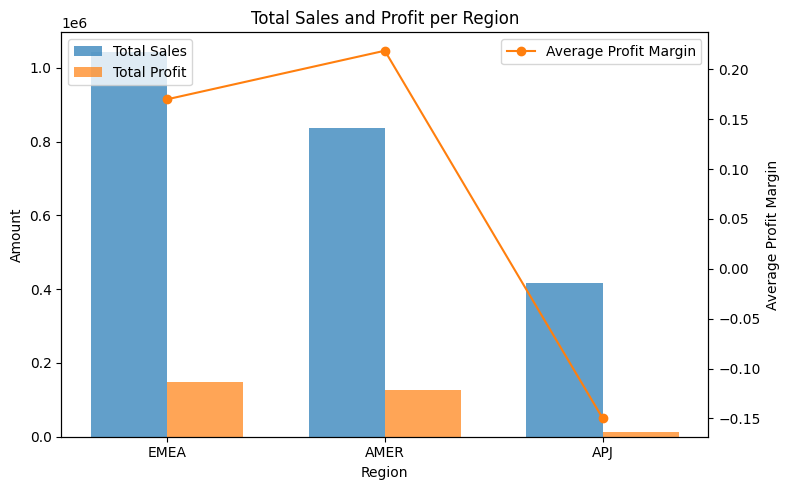

In [ ]:
region_stats = (
    df.groupby('Region')
      .agg(
          **{
              'Total Sales': ('Sales', 'sum'),
              'Total Profit': ('Profit', 'sum'),
              'Average Profit Margin': ('Profit Margin', 'mean')
          }
      )
      .sort_values('Total Sales', ascending=False)
      .reset_index()
)

print("Ringkasan metrik per Region:")
display(region_stats.round(2))

# visualisasi
fig, ax_left = plt.subplots(figsize=(8, 5))

x_pos = np.arange(len(region_stats['Region']))
bar_width = 0.35

ax_left.bar(x_pos - bar_width/2, region_stats['Total Sales'],
            width=bar_width, label='Total Sales', alpha=0.7)
ax_left.bar(x_pos + bar_width/2, region_stats['Total Profit'],
            width=bar_width, label='Total Profit', alpha=0.7)

ax_left.set_xlabel('Region')
ax_left.set_ylabel('Amount')
ax_left.set_xticks(x_pos)
ax_left.set_xticklabels(region_stats['Region'])
ax_left.set_title('Total Sales and Profit per Region')
ax_left.legend(loc='upper left')

ax_right = ax_left.twinx()
ax_right.plot(
    x_pos,
    region_stats['Average Profit Margin'],
    color='tab:orange',
    marker='o',
    label='Average Profit Margin'
)
ax_right.set_ylabel('Average Profit Margin')
ax_right.legend(loc='upper right')

plt.tight_layout()
plt.show()


**Insight**
- `EMEA` jadi region dengan kontribusi *sales* dan *profit* terbesar. Tapi profit marginnya (17%) masih lebih rendah dibanding AMER.

- `AMER` punya *profit margin* rata-rata paling tinggi (22%) meski salesnya tidak sebesar EMEA, menandakan pricing dan efisiensi yang lebih baik.

- `APJ` perlu perhatian khusus karena *profit margin*nya **negatif** (-15%). Artinya rata-rata transaksi di region ini justru merugi, mengindikasikan masalah pada harga, diskon, atau struktur biaya.

**Rekomendasi**
- Tingkatkan fokus pricing & operasional di `APJ`. Perlu evaluasi struktur harga, batas diskon, atau paket produk yang menyebabkan kerugian.

- Optimalkan strategi penjualan di `AMER` karena marginnya paling sehat, serta jadikan `EMEA` sebagai wilayah prioritas volume karena kontribusi sales terbesar.

`Analisis sub region`

Ringkasan metrik per Subregion:


,Region,Subregion,Total Sales,Total Profit,Average Profit Margin
4,APJ,IND,53555.36,18382.94,0.35
3,APJ,APAC,106771.21,30311.18,0.34
6,EMEA,EU,32114.61,8401.80,0.32
11,EMEA,UKIR,347468.02,85238.25,0.30
1,AMER,NAMER,596328.90,109784.04,0.28
9,EMEA,MEA,76793.70,7200.15,0.18
10,EMEA,NOR,127326.96,16044.76,0.17
0,AMER,LATAM,241520.70,17642.95,0.09
7,EMEA,EU-EAST,76118.11,3864.49,0.09
8,EMEA,EU-WEST,384065.61,26706.60,0.07


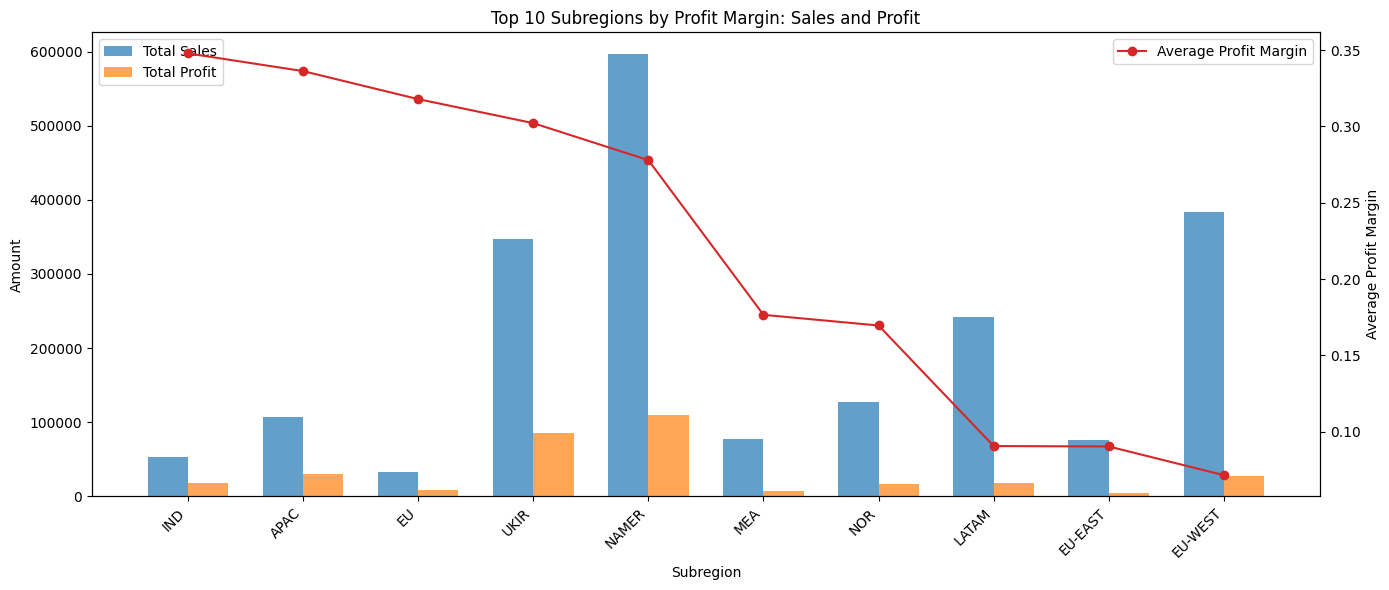

In [133]:
subregion_stats = (
    df.groupby(['Region', 'Subregion'])
      .agg(
          **{
              'Total Sales': ('Sales', 'sum'),
              'Total Profit': ('Profit', 'sum'),
              'Average Profit Margin': ('Profit Margin', 'mean')
          }
      )
      .reset_index()
)

print("Ringkasan metrik per Subregion:")
display(
    subregion_stats
      .sort_values('Average Profit Margin', ascending=False)
      .round(2)
)

# Top 10 subregion
top_sub = (
    subregion_stats
    .sort_values('Average Profit Margin', ascending=False)
    .head(10)
)

x = np.arange(len(top_sub['Subregion']))
bar_width = 0.35

fig, ax_left = plt.subplots(figsize=(14, 6))

ax_left.bar(x - bar_width/2, top_sub['Total Sales'],
            width=bar_width, label='Total Sales', alpha=0.7)
ax_left.bar(x + bar_width/2, top_sub['Total Profit'],
            width=bar_width, label='Total Profit', alpha=0.7)

ax_left.set_xlabel('Subregion')
ax_left.set_ylabel('Amount')
ax_left.set_xticks(x)
ax_left.set_xticklabels(top_sub['Subregion'], rotation=45, ha='right')
ax_left.set_title('Top 10 Subregions by Profit Margin: Sales and Profit')
ax_left.legend(loc='upper left')

ax_right = ax_left.twinx()
ax_right.plot(
    x,
    top_sub['Average Profit Margin'],
    color='tab:red',
    marker='o',
    label='Average Profit Margin'
)
ax_right.set_ylabel('Average Profit Margin')
ax_right.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Insight**
- Subregion dengan sales terbesar ada di `NAMER` dan `UKIR`, dan keduanya juga mencatat margin yang tinggi (27.8% dan 30.2%).

- Subregion dengan margin terbaik adalah `IND`, `APAC`, dan `UKIR`, semuanya berada di atas 30% meski kontribusi sales mereka lebih kecil.

- `JAPN` dan `ANZ` perlu perhatian karena profit margin **negatif** (lebih dari –34%). Dua subregion ini menjadi penyebab utama buruknya margin di kawasan APJ.

- `EU-WEST` memiliki sales besar, tetapi marginnya rendah (7.2%), sehingga perlu evaluasi terkait efisiensi biaya atau struktur harga.

**Rekomendasi**
- Fokuskan promosi dan ekspansi volume ke subregion bermargin sehat seperti `NAMER`, `UKIR`, `IND`, dan `APAC`, karena kombinasi sales dan marginnya bagus.

- Lakukan review untuk `JAPN`, `ANZ`, dan `EU-WEST` (aturan diskon, harga, dan biaya) agar margin bisa diperbaiki dan tidak terus menjadi sumber kerugian.

`Cek Produk yang paling laris`

Top 10 Products by Sales & Profit:


,Product,Sales,Profit,Profit Margin
0,ContactMatcher,410378.265,12496.282,0.030
1,FinanceHub,340935.415,32136.420,0.094
2,Site Analytics,330007.054,44515.731,0.135
3,Marketing Suite - Gold,223843.608,21278.826,0.095
4,Big Ol Database,189238.631,3384.757,0.018
5,Data Smasher,167380.318,41936.636,0.251
6,Alchemy,149528.030,55617.825,0.372
7,Support,125152.744,32864.470,0.263
8,Marketing Suite,114879.996,-3472.556,-0.030
9,OneView,107532.161,18138.005,0.169


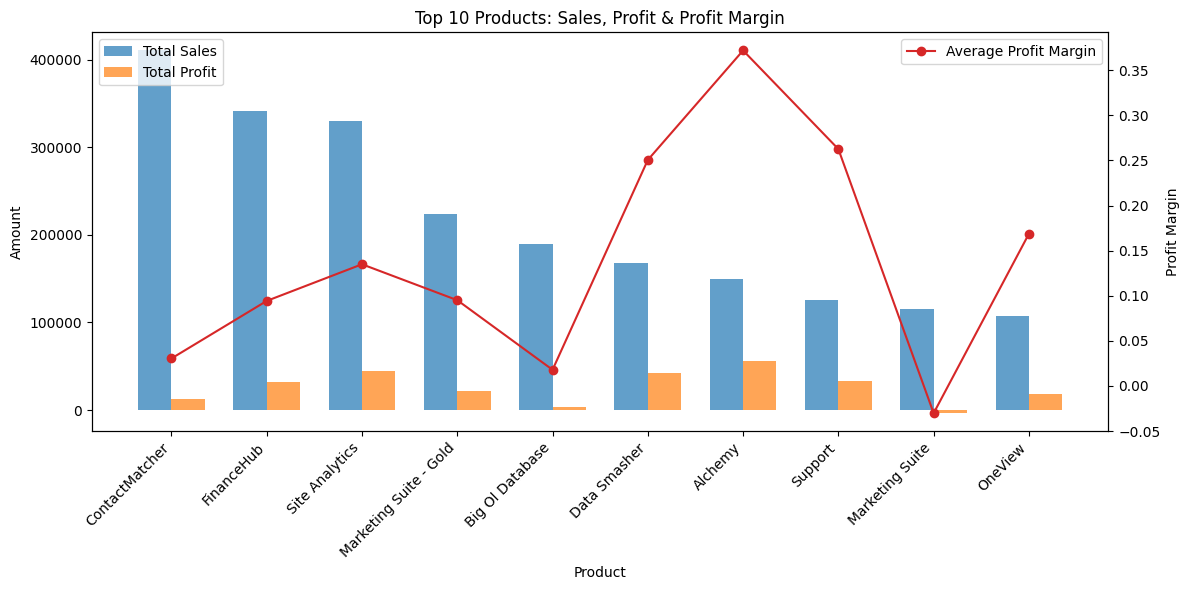

In [134]:
prod_summary = (
    df
    .groupby('Product')
    .agg({
        'Sales': 'sum',
        'Profit': 'sum'
    })
    .assign(**{
        'Profit Margin': lambda x: x['Profit'] / x['Sales']
    })
    .reset_index()
)

# Top 10
top10 = (
    prod_summary
    .sort_values('Sales', ascending=False)
    .head(10)
    .reset_index(drop=True)
)

print("Top 10 Products by Sales & Profit:")
display(top10[['Product', 'Sales', 'Profit', 'Profit Margin']].round(3))

x = range(len(top10))
bar_w = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar
ax1.bar(
    [i - bar_w/2 for i in x],
    top10['Sales'],
    width=bar_w,
    label='Total Sales',
    alpha=0.7
)
ax1.bar(
    [i + bar_w/2 for i in x],
    top10['Profit'],
    width=bar_w,
    label='Total Profit',
    alpha=0.7
)

ax1.set_xticks(x)
ax1.set_xticklabels(top10['Product'], rotation=45, ha='right')
ax1.set_ylabel('Amount')
ax1.set_xlabel('Product')
ax1.set_title('Top 10 Products: Sales, Profit & Profit Margin')
ax1.legend(loc='upper left')

# Line
ax2 = ax1.twinx()
ax2.plot(
    x,
    top10['Profit Margin'],
    color='tab:red',
    marker='o',
    label='Average Profit Margin'
)
ax2.set_ylabel('Profit Margin')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


**Insight**
- Produk terlaris belum tentu paling untung.  
  `ContactMatcher` memiliki penjualan tertinggi, tapi marginnya sangat tipis (3%). Sebaliknya, `Alchemy` menghasilkan profit terbesar dengan margin tinggi (37%) meski penjualannya lebih rendah.

- Produk bermargin tinggi jadi penggerak utama profit.  
  `Alchemy`, `Data Smasher`, `Support`, dan `Site Analytics` menyumbang profit besar dengan margin bagus.

- Ada produk yang justru merugikan.  
  `Marketing Suite` memiliki profit negatif (–3%), sehingga struktur harga atau kebijakan diskonnya perlu dievaluasi.

**Rekomendasi**
- Fokuskan promosi ke produk bermargin tinggi seperti `Alchemy`, `Support`, dan `Data Smasher` karena kontribusi profitnya paling besar.
- Tinjau ulang harga dan batas diskon untuk `ContactMatcher`, `Big Ol Database`, dan terutama `Marketing Suite` agar margin dapat diperbaiki dan tidak menjadi sumber kerugian.

`Cek margin profit segmen`

Ringkasan metrik per Segment:


,Segment,Total Sales,Total Profit,Average Profit Margin
0,SMB,1161401.34,134119.21,0.11
1,Strategic,706146.37,91979.13,0.12
2,Enterprise,429653.15,60298.68,0.14


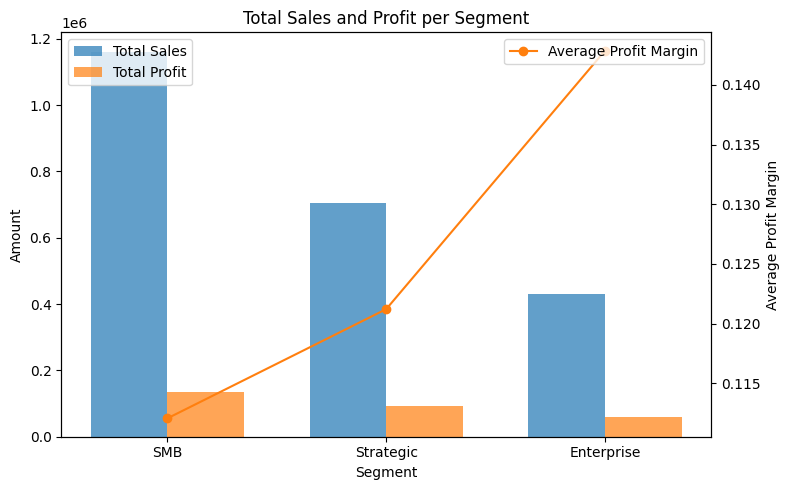

In [137]:
segment_stats = (
    df.groupby('Segment')
      .agg(
          **{
              'Total Sales': ('Sales', 'sum'),
              'Total Profit': ('Profit', 'sum'),
              'Average Profit Margin': ('Profit Margin', 'mean')
          }
      )
      .sort_values('Total Sales', ascending=False)
      .reset_index()
)

print("Ringkasan metrik per Segment:")
display(segment_stats.round(2))

# visualisasi
fig, ax_left = plt.subplots(figsize=(8, 5))

x_pos = np.arange(len(segment_stats['Segment']))
bar_width = 0.35

ax_left.bar(x_pos - bar_width/2, segment_stats['Total Sales'],
            width=bar_width, label='Total Sales', alpha=0.7)
ax_left.bar(x_pos + bar_width/2, segment_stats['Total Profit'],
            width=bar_width, label='Total Profit', alpha=0.7)

ax_left.set_xlabel('Segment')
ax_left.set_ylabel('Amount')
ax_left.set_xticks(x_pos)
ax_left.set_xticklabels(segment_stats['Segment'])
ax_left.set_title('Total Sales and Profit per Segment')
ax_left.legend(loc='upper left')

ax_right = ax_left.twinx()
ax_right.plot(
    x_pos,
    segment_stats['Average Profit Margin'],
    color='tab:orange',
    marker='o',
    label='Average Profit Margin'
)
ax_right.set_ylabel('Average Profit Margin')
ax_right.legend(loc='upper right')

plt.tight_layout()
plt.show()


**Insight**
- `SMB`
Total Sales paling tinggi (1.16M) dan Total Profit juga paling besar (134K). Tapi Average Profit Margin paling rendah (11%). Ini segmen yang perlu dikontrol.

- `Strategic`
Sales (706K) dan Profit (92K) masih kuat, dengan margin sedikit lebih baik (12%). Ini segmen yang relatif stabil.

- `Enterprise`
Walau Sales paling kecil (430K) dan Profit (60K), marginnya tertinggi (14%). Ini segemn yang sehat

**Rekomendasi**
- Jaga volume `SMB` dengan kontrol diskonnya, karena segmen ini besar kontribusinya namun margin tipis. Hindari diskon agresif pada produk yang sudah laris di `SMB` agar margin tidak makin turun.
- Pertahankan `Strategic` sebagai segmen ekspansi moderat, dengan diskon terukur. Fokus ke peningkatan sales tanpa mengorbankan margin.
- Prioritaskan peningkatan sales di `Enterprise`, karena marginnya paling tinggi sehingga setiap tambahan penjualan akan paling efektif menaikkan profit total.

## Kesimpulan

1. **Kinerja Regional & Subregional**  
   `EMEA` menjadi penyumbang sales dan profit terbesar, sedangkan `AMER` memiliki profit margin paling tinggi (22%).  
   `APJ` masih menjadi titik lemah karena mencatat margin negatif (–15%), terutama dari `JAPN` dan `ANZ` yang merugi.

2. **Kinerja Produk**  
   Produk terlaris belum tentu paling untung. `ContactMatcher` mencatat sales tertinggi tetapi margin sangat tipis (3%).  
   Profit utama datang dari produk bermargin tinggi seperti `Alchemy`, `Data Smasher`, `Support`, dan `Site Analytics`.  
   `Marketing Suite` justru merugi.

3. **Segmentasi Profit**  
   `SMB` mendominasi Sales dan Profit, tetapi margin paling rendah; sementara `Enterprise` punya margin tertinggi meski volumenya kecil, dan `Strategic` berada di posisi tengah yang stabil.

---

## Rekomendasi Akhir

1. **Perbaiki performa APJ terlebih dahulu**  
   Fokus evaluasi pada `JAPN` dan `ANZ` sebagai subregion penyebab kerugian.  
   Review pricing, aturan diskon, dan efisiensi biaya.

2. **Maksimalkan produk bermargin tinggi**  
   Prioritaskan promosi untuk `Alchemy`, `Data Smasher`, `Support`, dan `Site Analytics` karena kontribusi profitnya paling kuat.

3. **Strategi segmen**  
   Fokuskan strategi ganda: pertahankan volume `SMB` dengan kontrol diskon ketat, sambil mendorong pertumbuhan di `Enterprise` karena marginnya paling sehat (dengan `Strategic` sebagai target ekspansi moderat).
